#### Objective of Analysis:


To observe and gain insight on the overall trend, for all 6 parameters, Precipitation, Relative Humidity, Soil Water Content, Solar Radiation, Temperature and Wind Speed, over the period of a year month to month, with year by year comparison, by looking at both the minimum and maximum values.  
  

- [1. PRECIPITATION Min&Max over Time - Year by Year](#Precipitation) 

- [2. RELATIVE HUMIDITY Min&Max over Time - Year by Year](#Humidity) 

- [3. SOIL WATER CONTENT Min&Max over Time - Year by Year](#SoilWater) 

- [4. SOLAR RADIATION Min&Max over Time - Year by Year](#SolarRadiation) 

- [5. TEMPERATURE Min&Max over Time - Year by Year](#Temperature) 

- [6. WINDSPEED Min&Max over Time - Year by Year](#WindSpeed) 



In [1]:
# Import the necessary packages for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
weather = "C&P_Weather.csv"
print("Reading file: '{}'".format(weather))
weather_df = pd.read_csv(weather, parse_dates=[1])
print("Loaded...")
weather_df.head()

Reading file: 'C&P_Weather.csv'
Loaded...


,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,1.836935,0.044274,0.000000,253.559937,80.522964,36.355567,...,26.749389,14.515009,18.562212,35.878704,27.341182,14.485785,0.850048,7.670482,3.323550,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,315.266815,9.884958,0.000000,584.201131,95.683342,61.494675,...,19.781791,2.518120,12.920252,38.136787,29.881492,24.179960,1.930014,9.704402,5.296892,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,74.452164,1.453053,0.000000,403.134377,95.898270,47.959364,...,27.056979,6.033827,13.792599,37.047943,28.842866,20.951620,0.883048,7.675632,3.483753,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,3.193624,0.059078,0.000000,246.044713,81.980751,30.057683,...,27.142643,17.861103,34.799336,38.326847,30.793675,14.095855,1.655908,10.044715,4.657538,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,13.604791,3.099497,0.003973,111.754034,81.501442,65.086764,...,26.755711,20.742302,4.912013,16.228510,11.788805,6.686816,2.963118,11.432408,5.408138,1.995647


In [3]:
weather_df.columns

Index(['Date', 'Region', 'area', 'Precipitation_2nd_moment',
       'Precipitation_max', 'Precipitation_mean', 'Precipitation_min',
       'RelativeHumidity_2nd_moment', 'RelativeHumidity_max',
       'RelativeHumidity_mean', 'RelativeHumidity_min',
       'SoilWaterContent_2nd_moment', 'SoilWaterContent_max',
       'SoilWaterContent_mean', 'SoilWaterContent_min',
       'SolarRadiation_2nd_moment', 'SolarRadiation_max',
       'SolarRadiation_mean', 'SolarRadiation_min', 'Temperature_2nd_moment',
       'Temperature_max', 'Temperature_mean', 'Temperature_min',
       'WindSpeed_2nd_moment', 'WindSpeed_max', 'WindSpeed_mean',
       'WindSpeed_min'],
      dtype='object')

In [4]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], errors='coerce')

### PRECIPITATION Min & Max over Time - Year by Year 
<a class="anchor" id="Precipitation"></a>

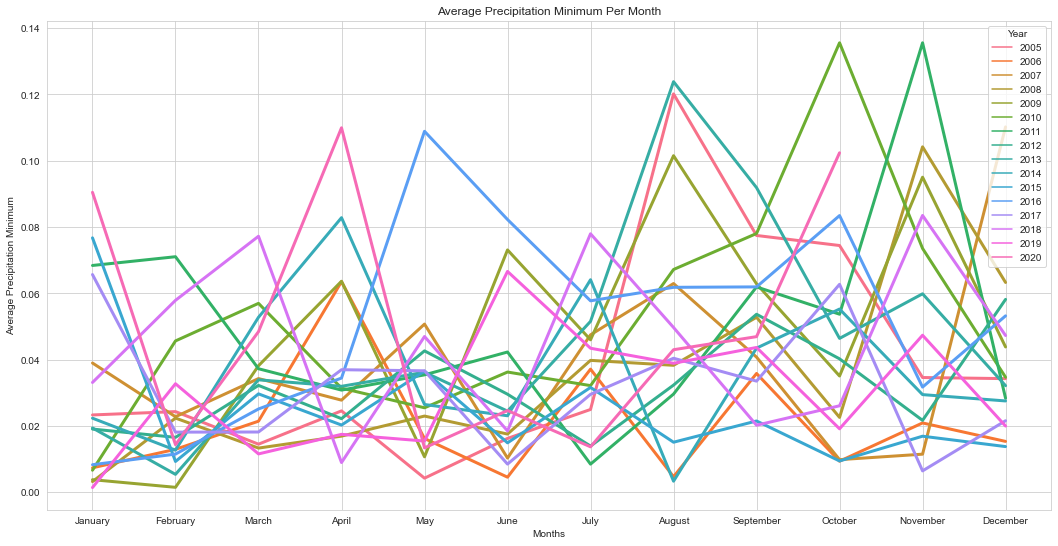

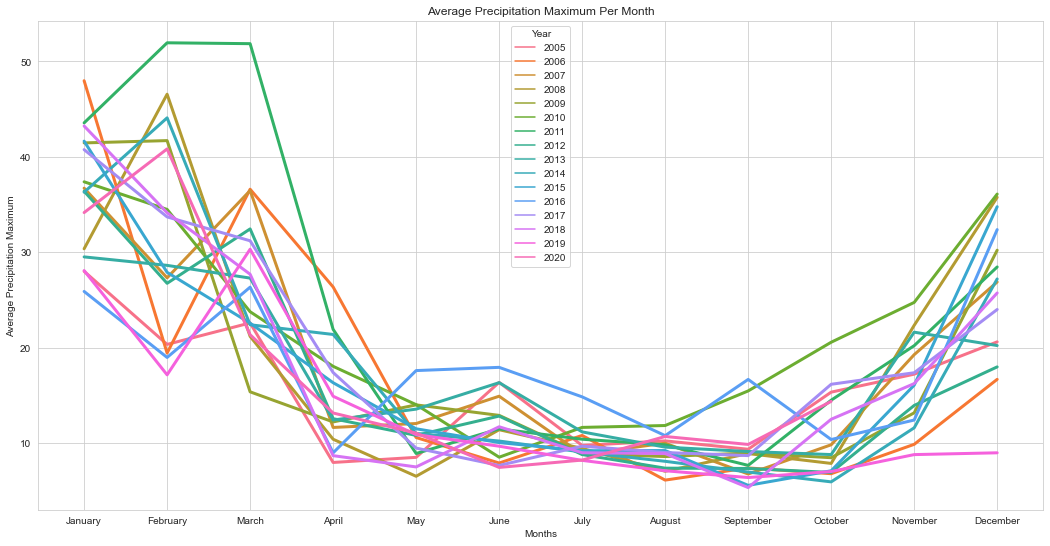

In [5]:
df_precipitation = weather_df[['Region', 'Date' ,'Precipitation_min', 'Precipitation_max',]].copy()
df_precipitation.drop_duplicates(inplace=True)
df_precipitation.sort_values(by=['Region', 'Date'])
df_precipitation.reset_index(drop=True, inplace=True)

df_precipitation['year'] = df_precipitation['Date'].dt.year
df_precipitation['month'] = df_precipitation['Date'].dt.month
df_precipitation['month_name'] = df_precipitation['Date'].dt.strftime('%B')

df_p = df_precipitation.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'Precipitation'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

### RELATIVE HUMIDITY Min & Max over Time - Year by Year 
<a class="anchor" id="Humidity"></a>

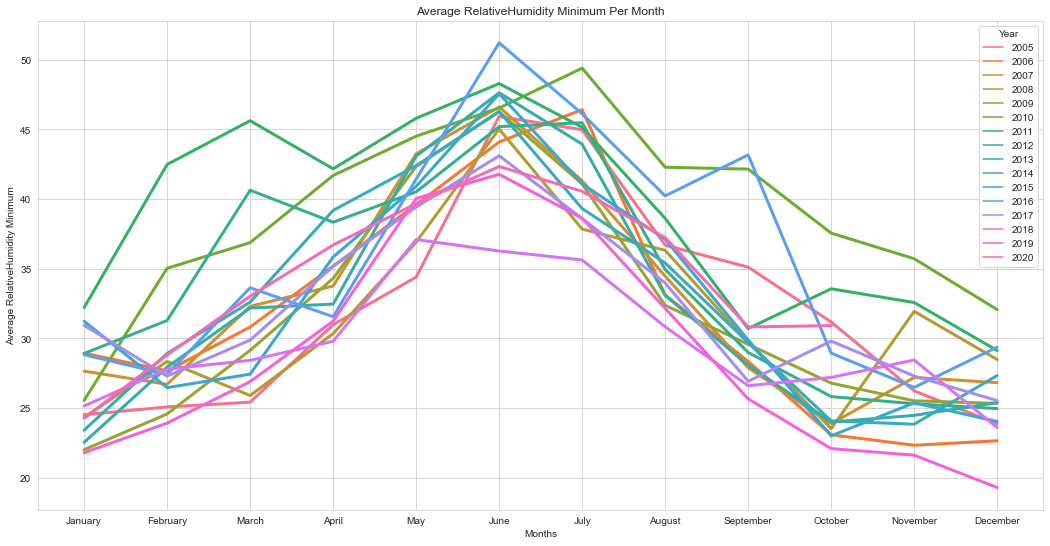

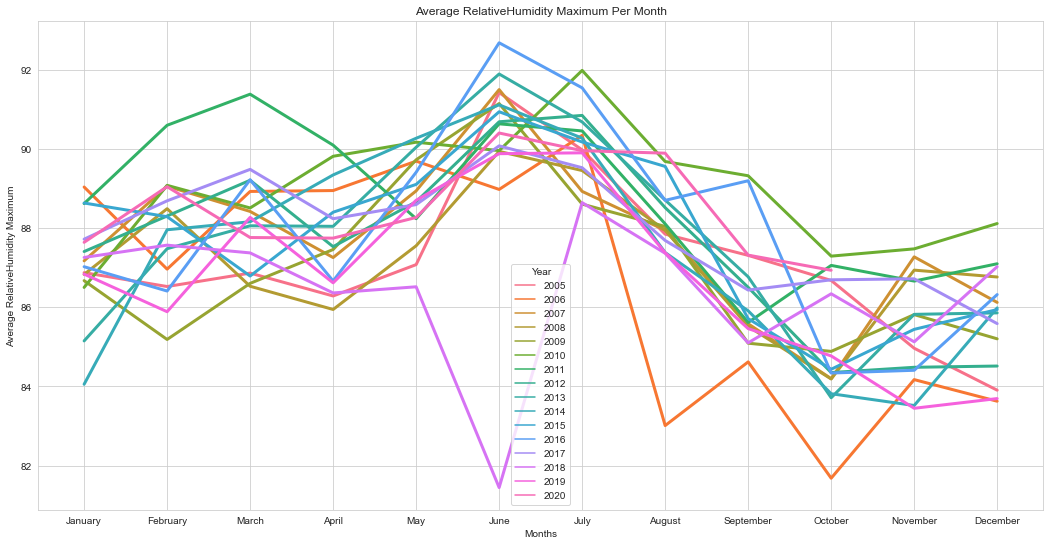

In [6]:
df_humidity = weather_df[['Region', 'Date' ,'RelativeHumidity_min', 'RelativeHumidity_max',]].copy()
df_humidity.drop_duplicates(inplace=True)
df_humidity.sort_values(by=['Region', 'Date'])
df_humidity.reset_index(drop=True, inplace=True)

df_humidity['year'] = df_humidity['Date'].dt.year
df_humidity['month'] = df_humidity['Date'].dt.month
df_humidity['month_name'] = df_humidity['Date'].dt.strftime('%B')

df_p = df_humidity.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'RelativeHumidity'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

### SOIL WATER CONTENT Min & Max over Time - Year by Year 
<a class="anchor" id="SoilWater"></a>

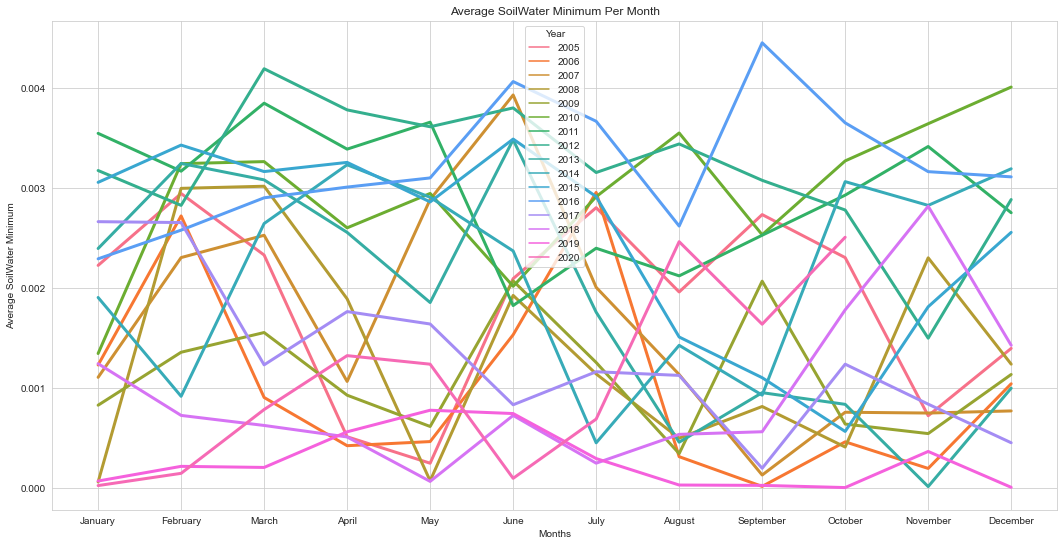

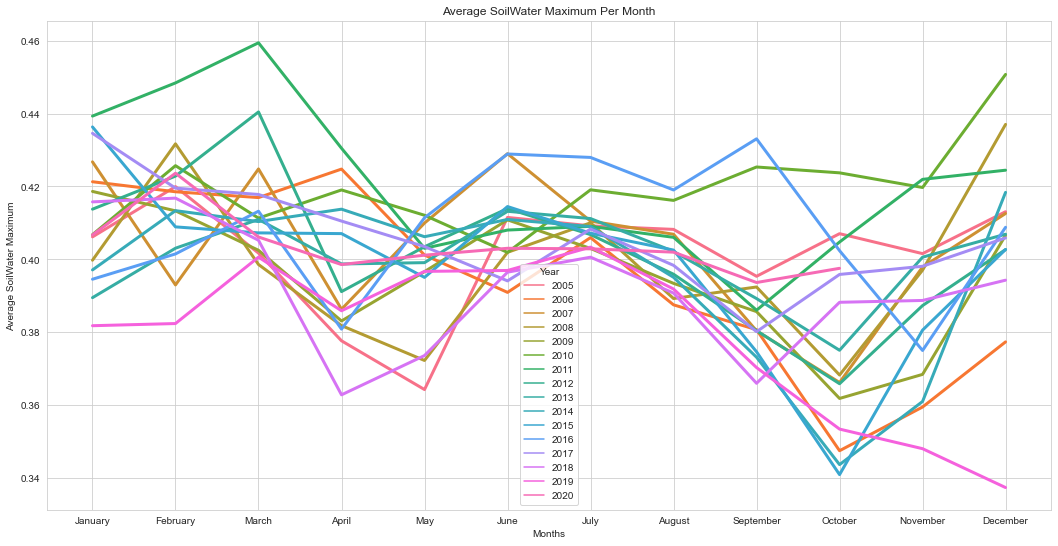

In [7]:
df_soilwater = weather_df[['Region', 'Date' ,'SoilWaterContent_min', 'SoilWaterContent_max',]].copy()
df_soilwater.drop_duplicates(inplace=True)
df_soilwater.sort_values(by=['Region', 'Date'])
df_soilwater.reset_index(drop=True, inplace=True)

df_soilwater['year'] = df_soilwater['Date'].dt.year
df_soilwater['month'] = df_soilwater['Date'].dt.month
df_soilwater['month_name'] = df_soilwater['Date'].dt.strftime('%B')

df_p = df_soilwater.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'SoilWater'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

### SOLAR RADIATION Min & Max over Time - Year by Year 
<a class="anchor" id="SolarRadiation"></a>

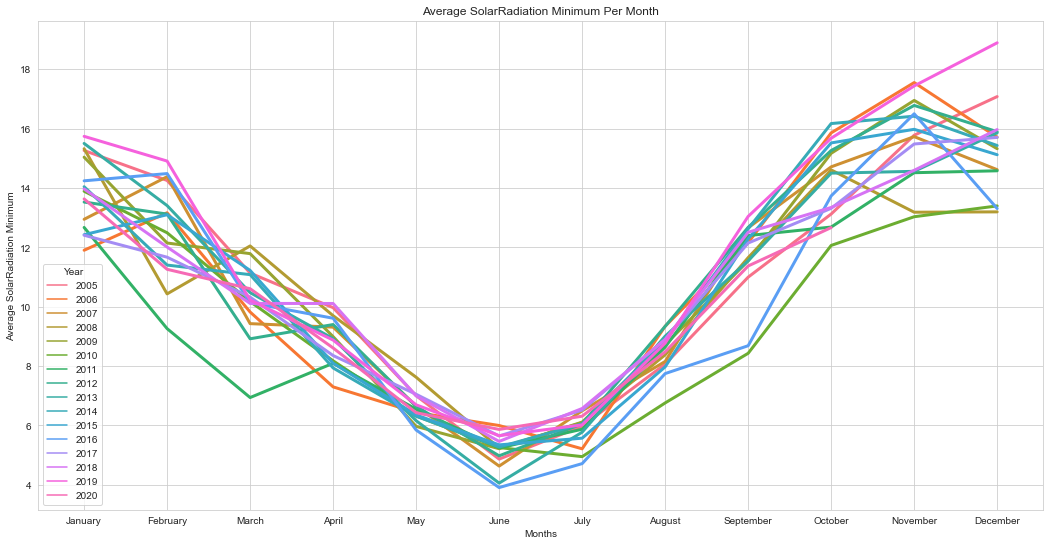

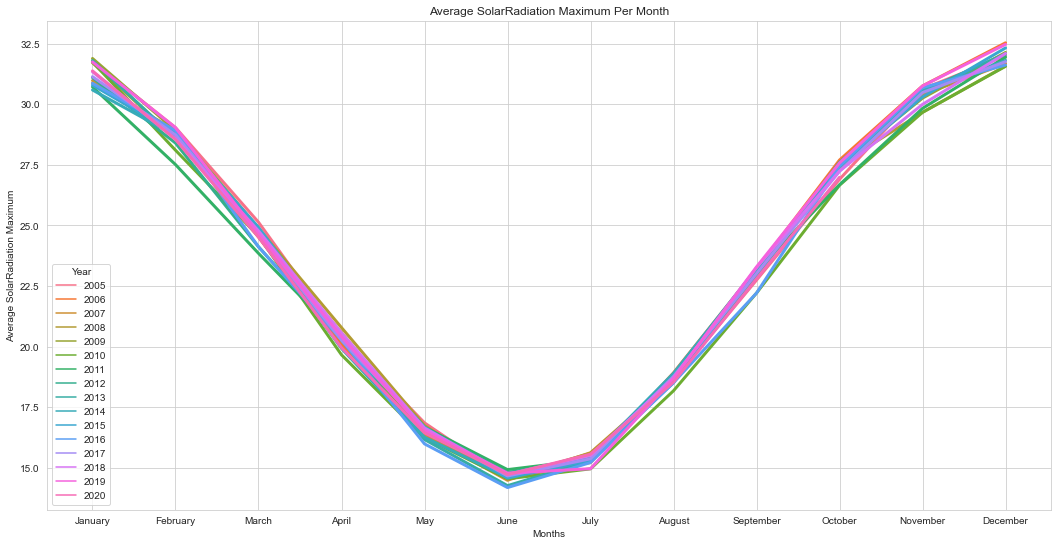

In [8]:
df_solar_radiation = weather_df[['Region', 'Date' ,'SolarRadiation_min', 'SolarRadiation_max']].copy()
df_solar_radiation.drop_duplicates(inplace=True)
df_solar_radiation.sort_values(by=['Region', 'Date'])
df_solar_radiation.reset_index(drop=True, inplace=True)

df_solar_radiation['year'] = df_solar_radiation['Date'].dt.year
df_solar_radiation['month'] = df_solar_radiation['Date'].dt.month
df_solar_radiation['month_name'] = df_solar_radiation['Date'].dt.strftime('%B')

df_p = df_solar_radiation.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'SolarRadiation'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

### TEMPERATURE Min & Max over Time - Year by Year 
<a class="anchor" id="Temperature"></a>

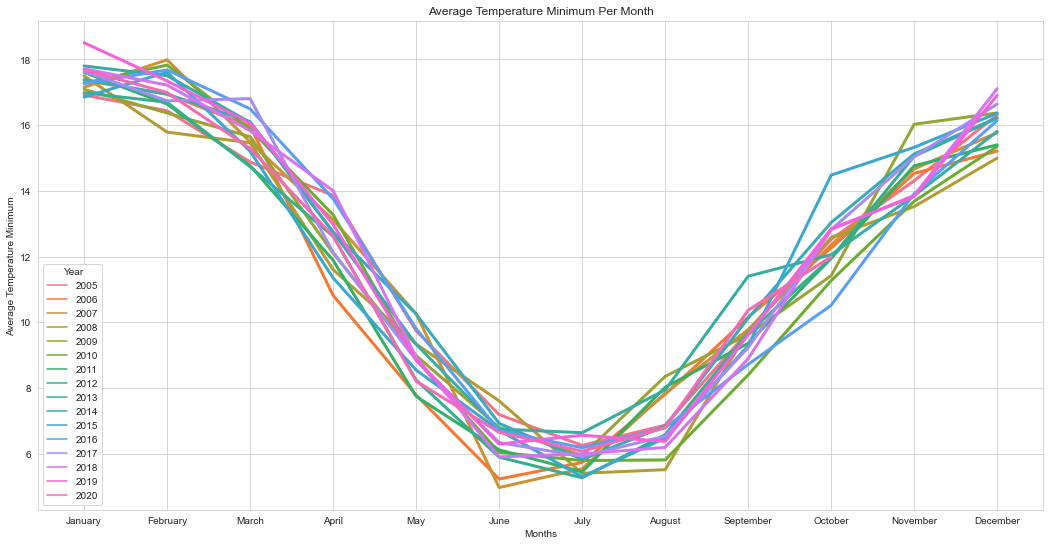

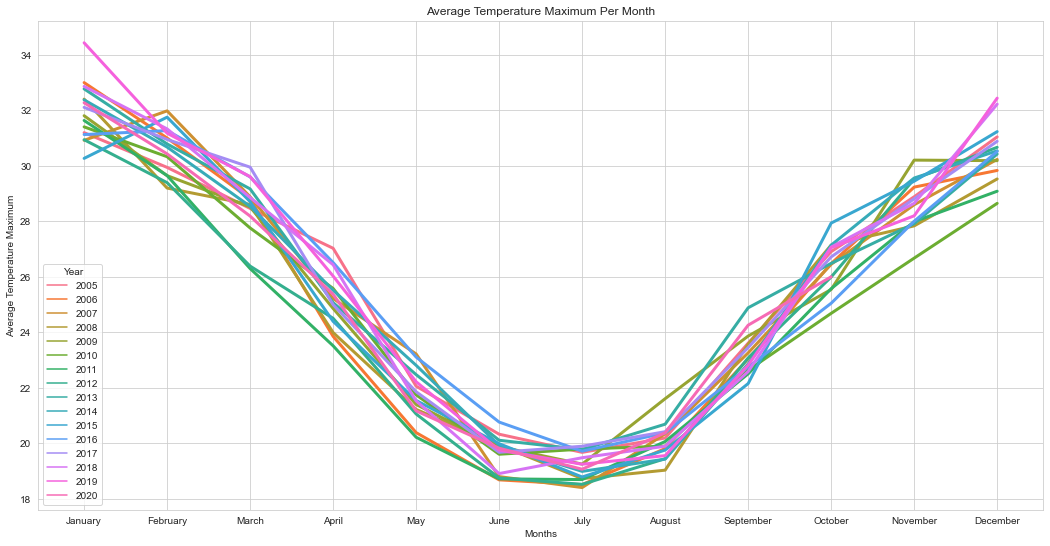

In [9]:
df_temperature = weather_df[['Region', 'Date' ,'Temperature_min', 'Temperature_max']].copy()
df_temperature.drop_duplicates(inplace=True)
df_temperature.sort_values(by=['Region', 'Date'])
df_temperature.reset_index(drop=True, inplace=True)

df_temperature['year'] = df_temperature['Date'].dt.year
df_temperature['month'] = df_temperature['Date'].dt.month
df_temperature['month_name'] = df_temperature['Date'].dt.strftime('%B')

df_p = df_temperature.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'Temperature'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

### WINDSPEED Min & Max over Time - Year by Year 
<a class="anchor" id="WindSpeed"></a>

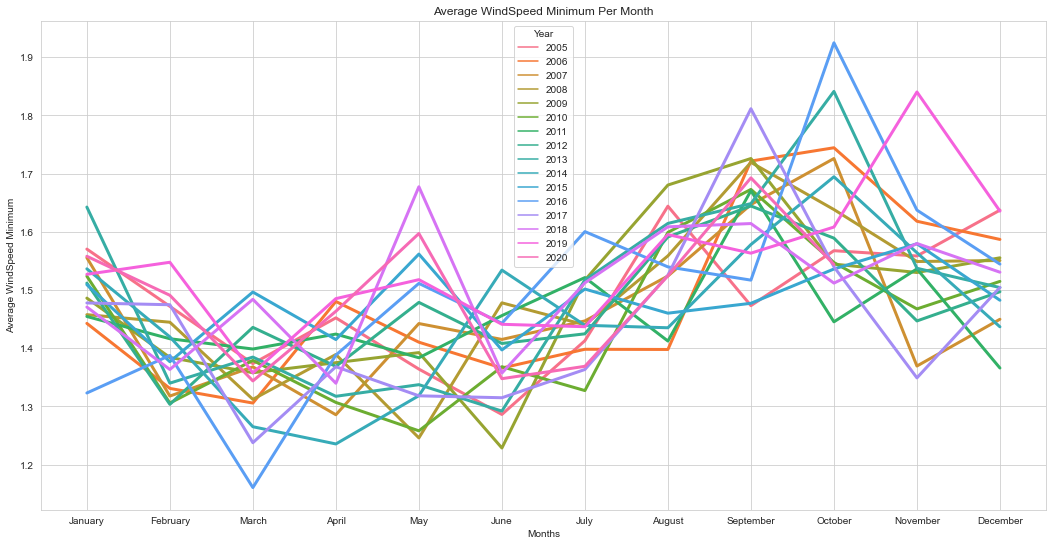

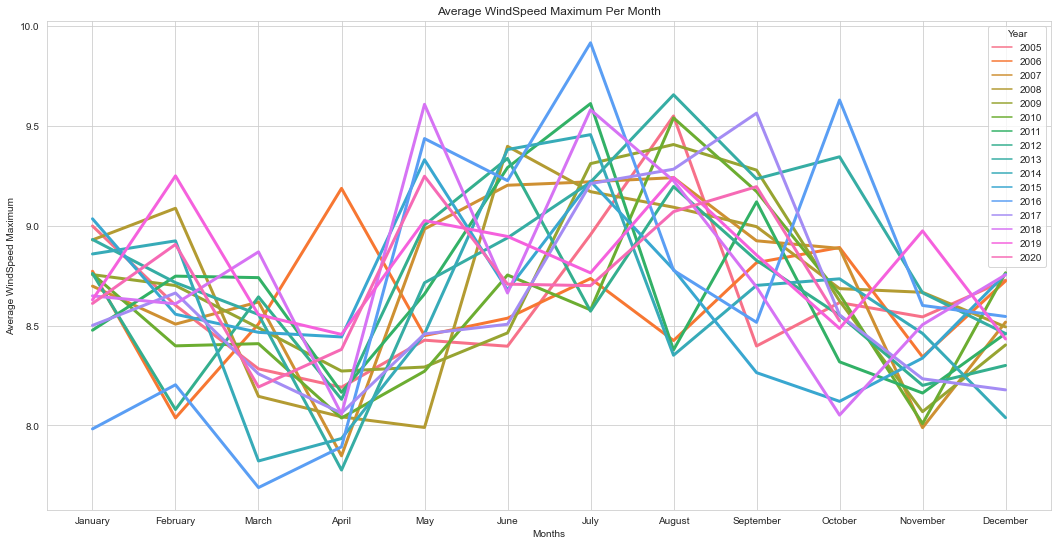

In [10]:
df_windspeed = weather_df[['Region', 'Date' ,'WindSpeed_min', 'WindSpeed_max']].copy()
df_windspeed.drop_duplicates(inplace=True)
df_windspeed.sort_values(by=['Region', 'Date'])
df_windspeed.reset_index(drop=True, inplace=True)

df_windspeed['year'] = df_windspeed['Date'].dt.year
df_windspeed['month'] = df_windspeed['Date'].dt.month
df_windspeed['month_name'] = df_windspeed['Date'].dt.strftime('%B')

df_p = df_windspeed.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'WindSpeed'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()